# Libraries

In [2]:
import numpy as np
from scipy import stats #scipy is the library; stats is the module within the library
from scipy.stats import norm, expon, binom, poisson
import math
import pandas as pd

#images
from IPython.display import Image

#visualization
import seaborn as sns
sns.set_style('darkgrid')

from matplotlib import pyplot as plt #matplotlib is the library, and pyplot is the module
%matplotlib inline

----

# 2.21- Covariance and Correlation

### COVARIANCE

Measures how two variables vary in tandem from their means

![covariance_function](img/covariance_formula.jpg)

*xi* = member of x\
*yi* = member of y\
*$\bar{x}$* = mean of x\
*$\bar{y}$* = mean of y\
*N* = number of members

Example:

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:

In [26]:
def dev_mean(x):
    xmean = np.mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return np.dot(dev_mean(x), dev_mean(y)) / (n-1) # dividiing by (n-1) bc dealing with sample

-0.3945949253036005

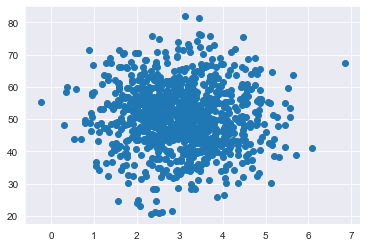

In [28]:
np.random.seed(42)

pageSpeeds = np.random.normal(3.0, 1.0, 1000) #random data; normally distributed
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

plt.scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)

Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

-2.8595390509129825

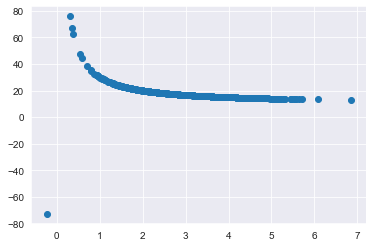

In [30]:
np.random.seed(42)

purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)

But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Step in correlation...

### CORRELATION

Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

- correlation of -1  means a perfect inverse correlation
- correlation of 0: no correlation
- correlation 1: perfect correlation

**IMPORTANT**: Correlation does not imply causation
- Only controlled, randomized experiment can give insights into causation
- Use correlation to decide what experiments to conduct

In [31]:
def correlation(x, y):
    stddev_x = x.std() # equivalent of np.std(x)
    stddev_y = y.std()
    return covariance(x,y) / stddev_x / stddev_y

In [36]:
correlation(pageSpeeds, purchaseAmount)

-0.5580245841867629

numpy can do this, using numpy.corrcoef

Returns a matrix of teh correlation coefficients between every combination of the arrays passed in:

In [37]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.55746656],
       [-0.55746656,  1.        ]])

(It doesn't match exactly just due to the math precision available on a computer.)

## Activity

numpy also has a numpy.cov function that can compute Covariance for you. Try using it for the pageSpeeds and purchaseAmounts data above. Interpret its results, and compare it to the results from our own covariance function above.

In [38]:
np.cov(pageSpeeds, purchaseAmount)

array([[ 0.95886385, -2.85953905],
       [-2.85953905, 27.44084463]])

---

# 2.22 & 23: Conditional Probability

Notataion:
- P(A,B) --> probability of A and B both occurring
- P(A|B) --> probability of B given A has occured
  
  P(A|B) = $P(A,B) / P(A)$

Below is some code to create some fake data on how much stuff people purchase given their age range.

It generates 100,000 random "people" and randomly assigns them as being in their 20's, 30's, 40's, 50's, 60's, or 70's.

It then assigns a lower probability for young people to buy stuff.

In the end, we have two Python dictionaries:

"totals" contains the total number of people in each age group.
"purchases" contains the total number of things purchased by people in each age group.
The grand total of purchases is in totalPurchases, and we know the total number of people is 100,000.

Let's run it and have a look:

In [40]:
np.arange(20, 80, 10)

array([20, 30, 40, 50, 60, 70])

In [194]:
np.random.seed(0)

totals = {x:0 for x in np.arange(20, 80, 10)} #dictionary {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {x:0 for x in np.arange(20, 80, 10)}

totalPurchases = 0

for _ in range(100000): #reason using _ instead of a variable, bc we're not calling that variable in the code anywhere; we just need a placeholder
    ageDecade = np.random.choice(np.arange(20, 80, 10))
    totals[ageDecade] += 1
    purchaseProbability = float(ageDecade) / 100.0
    if (np.random.random() < purchaseProbability): #random.random() randomly picks # bw 0 & 1
        totalPurchases += 1
        purchases[ageDecade] += 1

In [195]:
totals 

#number of people from ea age group
#so there are 16,576 people in the 20s age group

{20: 16576, 30: 16619, 40: 16632, 50: 16805, 60: 16664, 70: 16704}

In [69]:
purchases 

#number of purchases made by people of ea age group
#so out of 16,576 people in their 20s, 3,392 peeps made purchases

{20: 3392, 30: 4974, 40: 6670, 50: 8319, 60: 9944, 70: 11713}

In [67]:
totalPurchases

45012

Let's play with conditional probability.

First let's compute P(E|F), where E is "purchase" and F is "you're in your 30's". The probability of someone in their 30's buying something is just the percentage of how many 30-year-olds bought something:

In [89]:
PEF = purchases[30] / totals[30]
print('P(Purchase | 30s):', PEF)

P(Purchase | 30s): 0.29929598652145134


We can compute P(E) and P(F) independentally too.

P(F) is just the probability of being 30 in this data set:

In [88]:
PF = totals[30] / 100000
print('P(30s):', PF)

P(30s): 0.16619


P(E) is the overall probability of buying something, regardless of your age:

In [87]:
PE = totalPurchases / 100000
print('P(Purchase):', PE)

P(Purchase): 0.45012


**If E and F were independent, then we would expect P(E|F) to be about the same as P(E).**\
But they're not; P(E) is 0.45, and P(E|F) is about 0.3. So, that tells us that E and F are dependent (which we know they are in this example.)

Also rmr, P(E,F) is different from P(E|F).\
P(E,F) would be the probability of both being in your 30's and buying something, out of the total population - not just the population of people in their 30's.

P(E,F):

In [86]:
print('P(30s, Purchase):', purchases[30] / 100000)

P(30s, Purchase): 0.04974


Furthermore, P(E,F) will be different from the product of P(E) and P(F). 

P(E)P(F):

In [90]:
print('P(30s)P(Purchase):', PE*PF)

P(30s)P(Purchase): 0.07480544280000001


Something you may learn in stats is that P(E,F) = P(E)P(F), *but this is only true if **E and F are independent**.* 

We've found here that P(E,F) is about 0.05, while P(E)P(F) is about 0.075. **So when E and F are dependent - and we have a conditional probability going on - we can't just say that P(E,F) = P(E)P(F).**

We can also check that P(E|F) = P(E,F)/P(F), which is the relationship we showed in the slides - and sure enough, it is:

In [93]:
print(((purchases[30] / 100000)/PF) == PEF)

True


## Your Assignment

Modify the code above such that the purchase probability does NOT vary with age, making E and F actually independent.

Then, confirm that P(E|F) is about the same as P(E), showing that the conditional probability of purchase for a given age is not any different than the a-priori probability of purchase regardless of age.

In [196]:
np.random.seed(0)

totals = {x:0 for x in np.arange(20, 80, 10)}
purchases = {x:0 for x in np.arange(20, 80, 10)}

totalPurchases = 0

for _ in range(100000):
    ageDecade = np.random.choice(np.arange(20, 80, 10))
    totals[ageDecade] += 1
    if np.random.random() > np.abs(np.random.normal(0.5, 0.25)):
        purchases[ageDecade] += 1
        totalPurchases += 1

In [197]:
totalPurchases

49985

In [198]:
totals

{20: 16669, 30: 16516, 40: 16680, 50: 16555, 60: 16900, 70: 16680}

In [199]:
purchases

{20: 8245, 30: 8248, 40: 8425, 50: 8349, 60: 8412, 70: 8306}

Now that these are independent, let's see if P(E|F) equals P(E).

First let's compute P(E|F), where E is "purchase" and F is "you're in your 30's". The probability of someone in their 30's buying something is just the percentage of how many 30-year-olds bought something: 

In [181]:
PEF = purchases[30] / totals[30]
print('P(Purchase | 30s):', PEF)

P(Purchase | 30s): 0.4993945265197384


P(E) is the overall probability of buying something, regardless of your age:

In [182]:
print('P(Purchase):', totalPurchases/100000)

P(Purchase): 0.49985


Here we can see that P(E|F) is somewhat equal to P(E), therefore we can conclude that these two events are most likely independent.